In [9]:
import pandas as pd
import numpy as np
import networkx as nx

df = pd.read_csv('./Data/pp_sim_2017_2019.csv', delimiter=';')
df

,HS6_i,HS6_j,n_ij,n_i,n_j,n,psim,psim_norm,link01,short_name_ENG_i,short_name_ENG_j
0,107111,107112,356,6275,6167,731532,6.729699,0.741258,1,Fresh bread containing by,Cake and pastry products;
1,181214,181219,60,4081,3683,731532,2.920225,0.489825,1,"Printed books, brochures,",Printed calendars of any
2,181212,181214,59,3287,4081,731532,3.217504,0.525786,1,Printed commercial catalo,"Printed books, brochures,"
3,310112,310912,57,3568,3342,731532,3.496849,0.555244,1,Wooden furniture of a kin,Wooden bedroom furniture
4,181213,181214,55,2586,4081,731532,3.812421,0.584409,1,"Printed newspapers, journ","Printed books, brochures,"
...,...,...,...,...,...,...,...,...,...,...,...
40086,242034,289230,1,1226,1175,731532,0.507814,-0.326423,0,"Tubes and pipes, of non-c",Pile-drivers and pile-ext
40087,242034,289227,1,1226,969,731532,0.615771,-0.237799,0,"Tubes and pipes, of non-c",Bulldozer or angledozer b
40088,242034,282983,1,1226,1097,731532,0.543922,-0.295403,0,"Tubes and pipes, of non-c",Cylinders for calendering
40089,242034,282922,1,1226,1720,731532,0.346908,-0.484882,0,"Tubes and pipes, of non-c",Fire extinguishers


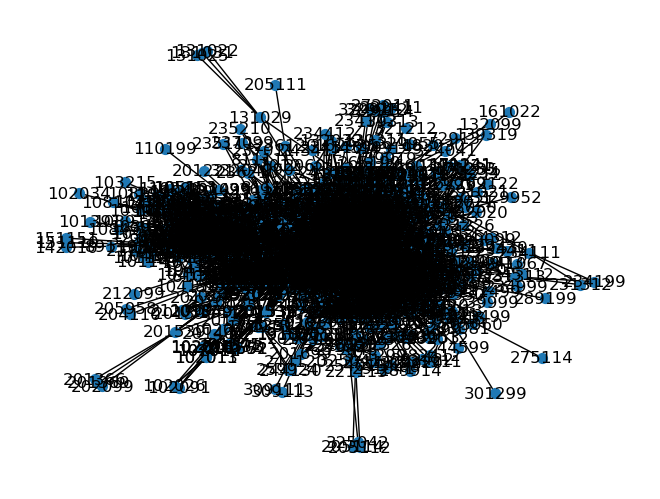

In [17]:
G = nx.Graph()

# Add the nodes

unique_product_codes = set(df['HS6_i']).union(set(df['HS6_j']))

G.add_nodes_from(unique_product_codes)

# Add the edges
for _, row in df.iterrows():
    product_i = row['HS6_i']
    product_j = row['HS6_j']
    weight = row['n_ij']
    G.add_edge(product_i, product_j, weight=weight)

nx.draw(G,node_size=50,with_labels=True)


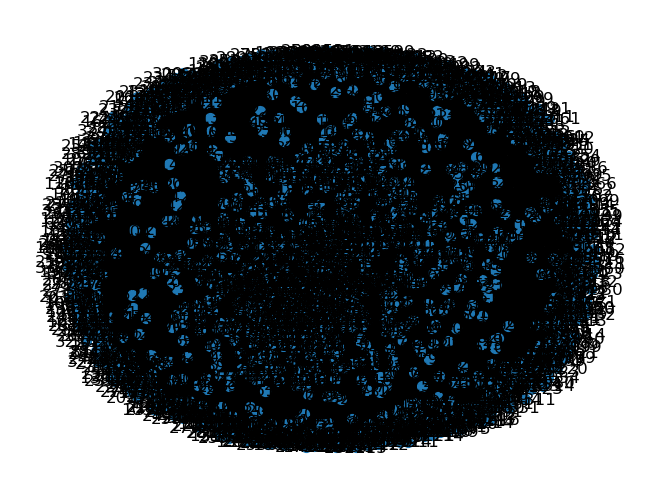

In [18]:
# Calculate the total value of weights
total_weight = sum([d['weight'] for u, v, d in G.edges(data=True)])

# Normalize weights using the total value
for u, v, d in G.edges(data=True):
    d['weight'] /= total_weight

nx.draw(G,node_size=50,with_labels=True)


In [19]:
As = nx.adjacency_matrix(G)
A =As.todense()
print(A)


[[0.00000000e+00 0.00000000e+00 1.69652552e-05 ... 1.69652552e-05
  1.69652552e-05 1.69652552e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.69652552e-05 0.00000000e+00 0.00000000e+00 ... 1.69652552e-05
  1.69652552e-05 1.69652552e-05]
 ...
 [1.69652552e-05 0.00000000e+00 1.69652552e-05 ... 0.00000000e+00
  1.69652552e-05 1.69652552e-05]
 [1.69652552e-05 0.00000000e+00 1.69652552e-05 ... 1.69652552e-05
  0.00000000e+00 1.69652552e-05]
 [1.69652552e-05 0.00000000e+00 1.69652552e-05 ... 1.69652552e-05
  1.69652552e-05 0.00000000e+00]]


In [21]:
d = nx.degree(G)
d = dict(d)
print(d)
print("average degree: ", sum(d.values())/len(G.nodes))

{131081: 12, 131082: 10, 131083: 12, 131085: 12, 221199: 1, 131092: 7, 131099: 8, 139299: 151, 139311: 2, 139312: 139, 139313: 2, 352310: 99, 139319: 1, 254011: 4, 254012: 4, 254013: 5, 254014: 7, 172111: 8, 172112: 140, 172113: 230, 172114: 147, 172115: 118, 139411: 166, 139412: 102, 139420: 101, 172199: 168, 172211: 63, 172212: 130, 139499: 6, 139510: 37, 172299: 101, 172311: 4, 172312: 65, 172313: 111, 172314: 21, 205111: 1, 205112: 2, 205114: 2, 139599: 8, 139613: 97, 139614: 205, 139615: 3, 139616: 55, 139617: 43, 172399: 127, 172411: 2, 205210: 280, 139699: 18, 279011: 215, 279012: 84, 279013: 13, 279020: 99, 279031: 93, 279032: 95, 279033: 189, 205310: 64, 279041: 290, 279043: 2, 279044: 259, 279045: 5, 279052: 73, 279053: 44, 279060: 126, 279070: 158, 279082: 31, 279099: 77, 205399: 7, 107111: 35, 107112: 47, 139911: 13, 139912: 138, 139913: 2, 139915: 1, 139919: 3, 107199: 4, 107211: 60, 107212: 57, 99019: 6, 107219: 59, 221910: 14, 139999: 117, 221920: 210, 221930: 170, 35301

In [ ]:
nx.degree_histogram(G)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

(0.0, 4.0)

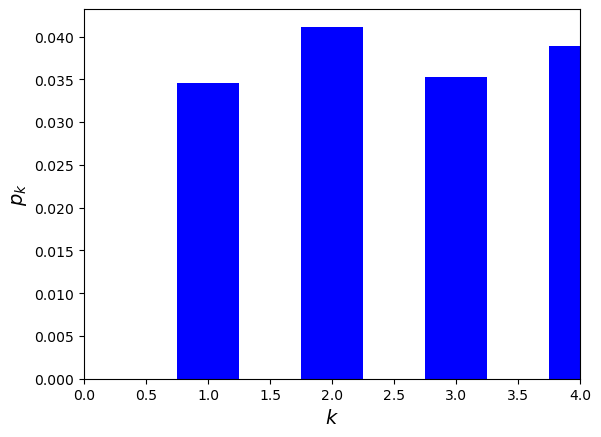

In [22]:
import matplotlib.pyplot as plt
x = list(range(max(d.values())+1))
y = [i/len(G.nodes) for i in nx.degree_histogram(G)]
print(x)
print(y)

plt.bar(x, y, width=0.5, color="blue")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("$p_k$", fontsize=14)
plt.xlim([0,4])